# Classificação e Métricas de Avaliação

O objetivo deste notebook é apresentar as funções do SKlearn para metrificação de modelos de classificação. É um material complementar a aula de **Classificação e Métricas de Avaliação**.

Dica:
- consulte sempre as documentações pra verificar as parametrizações das função. Este é uma grande fonte de aprendizado. :)

Importando pacotes que vamos utilizar neste notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
import pandas as pd

# Evita que o pandas apresente valores em notação científica
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Dataset

Geração sintética do dataset que será utilizado para treinamento do modelo de classificação usando Regressão Logística.

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500 ,n_features=2, n_redundant=0, 
                           n_informative=2, random_state=42, 
                           n_clusters_per_class=1, weights=(.8, 0.1))

## Analisando as amostras do dataset

In [ ]:
# Invertendo a representação das classe 0 -> 1 // 1 -> 0 para convenção, somente.
y = y - 1
y[y == -1] = 1

In [ ]:
# Spams 
len(X[y == 0])

76

In [ ]:
# Normais
len(X[y == 1])

424

## Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Métricas

In [ ]:
y_pred = logreg.predict(X)

In [ ]:
# Função que comentamos em sala sobre as propabilidades da Regressão Logística
y_pred_proba = logreg.predict_proba(X)

In [ ]:
y_pred_proba

array([[1.72996447e-02, 9.82700355e-01],
       [1.67643344e-01, 8.32356656e-01],
       [3.40335791e-03, 9.96596642e-01],
       [3.51215220e-01, 6.48784780e-01],
       [1.38748709e-01, 8.61251291e-01],
       [4.52129864e-02, 9.54787014e-01],
       [4.67097403e-01, 5.32902597e-01],
       [5.02896157e-01, 4.97103843e-01],
       [2.40564610e-02, 9.75943539e-01],
       [1.22701540e-02, 9.87729846e-01],
       [2.77222037e-03, 9.97227780e-01],
       [9.37422019e-04, 9.99062578e-01],
       [2.32979924e-03, 9.97670201e-01],
       [9.23427713e-02, 9.07657229e-01],
       [4.03370759e-01, 5.96629241e-01],
       [4.05002082e-02, 9.59499792e-01],
       [4.59715121e-02, 9.54028488e-01],
       [1.91827551e-02, 9.80817245e-01],
       [1.93918770e-03, 9.98060812e-01],
       [4.79669717e-02, 9.52033028e-01],
       [2.45849372e-02, 9.75415063e-01],
       [2.90379696e-03, 9.97096203e-01],
       [4.73515950e-03, 9.95264841e-01],
       [6.89351796e-01, 3.10648204e-01],
       [5.198563

### Acurácia

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred, normalize=False)

469

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.938

### Matriz de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[ 51,  25],
       [  6, 418]])

In [ ]:
(418 + 51)/500

0.938

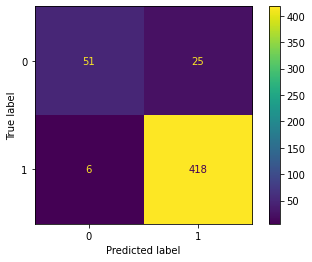

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(values_format='d') 

### Precisão e Recall

In [ ]:
from sklearn.metrics import precision_score
precision_score(y, y_pred, pos_label=0)

0.8947368421052632

In [ ]:
from sklearn.metrics import recall_score
recall_score(y, y_pred, pos_label=0)

0.6710526315789473

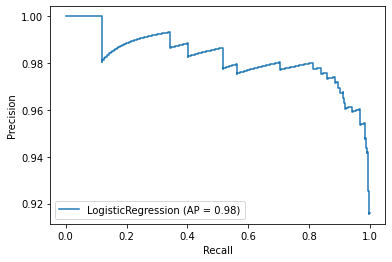

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(logreg, X, y)

### F1 Score

In [ ]:
from sklearn.metrics import f1_score
f1_score(y, y_pred, pos_label = 0)

0.7669172932330827

### Curvas ROC e AUC

In [ ]:
# Este é o ponto no qual eu altero o threshold da Regressão Logística. 
# Alterando este valor conseguimos verificar as contas que fizemos 
# juntos na aula para construção da curva ROC.
result = y_pred_proba[:] < 0.7

In [ ]:
result[:10]

array([[ True, False],
       [ True, False],
       [ True, False],
       [ True,  True],
       [ True, False],
       [ True, False],
       [ True,  True],
       [ True,  True],
       [ True, False],
       [ True, False]])

In [ ]:
positve_proba = np.zeros(500)
i = 0
for vec in result:
  if vec[0]:
    positve_proba[i] = True
  else:
    positve_proba[i] = False
  i = i + 1
np.unique(positve_proba, return_counts=True)

(array([0., 1.]), array([ 38, 462]))

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y, positve_proba)
conf_matrix

array([[ 37,  39],
       [  1, 423]])

In [ ]:
# Sensitividade
conf_matrix[0][0]/(conf_matrix[0][0]+conf_matrix[0][1])

0.4868421052631579

In [ ]:
# 1 - Especificidade
conf_matrix[1][0]/(conf_matrix[1][0]+conf_matrix[1][1])

0.0023584905660377358

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, positve_proba, target_names=['Normal', 'Spam']))

              precision    recall  f1-score   support

      Normal       0.97      0.49      0.65        76
        Spam       0.92      1.00      0.95       424

    accuracy                           0.92       500
   macro avg       0.94      0.74      0.80       500
weighted avg       0.92      0.92      0.91       500



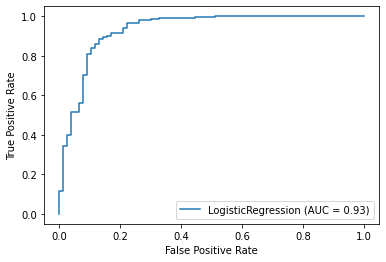

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(logreg, X, y)
plt.show()

### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred, target_names=['Normal', 'Spam']))

              precision    recall  f1-score   support

      Normal       0.89      0.67      0.77        76
        Spam       0.94      0.99      0.96       424

    accuracy                           0.94       500
   macro avg       0.92      0.83      0.87       500
weighted avg       0.94      0.94      0.93       500



### Visualização dos resultados e decision boundary

No handles with labels found to put in legend.


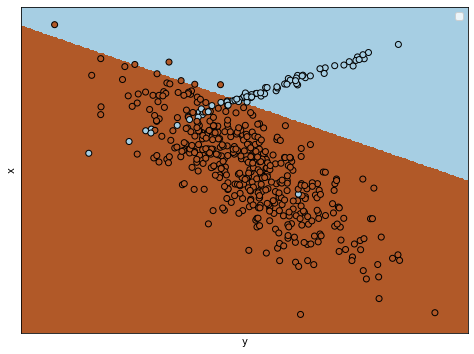

In [ ]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('y')
plt.ylabel('x')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.legend()
plt.show()

## Decision Tree

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

No handles with labels found to put in legend.


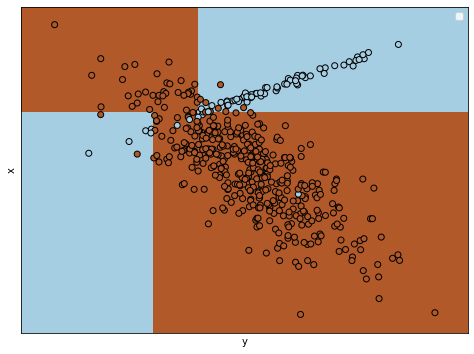

In [ ]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('y')
plt.ylabel('x')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.legend()
plt.show()

In [ ]:
y_pred = tree_clf.predict(X)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.97

In [ ]:
# Função que comentamos em sala sobre as propabilidades da Regressão Logística
y_pred_proba = tree_clf.predict_proba(X)
y_pred_proba

array([[0.01554404, 0.98445596],
       [0.01554404, 0.98445596],
       [0.01554404, 0.98445596],
       [0.        , 1.        ],
       [0.01554404, 0.98445596],
       [0.01554404, 0.98445596],
       [0.90277778, 0.09722222],
       [0.        , 1.        ],
       [0.01554404, 0.98445596],
       [0.01554404, 0.98445596],
       [0.01554404, 0.98445596],
       [0.01554404, 0.98445596],
       [0.01554404, 0.98445596],
       [0.01554404, 0.98445596],
       [0.        , 1.        ],
       [0.01554404, 0.98445596],
       [0.01554404, 0.98445596],
       [0.01554404, 0.98445596],
       [0.01554404, 0.98445596],
       [0.01554404, 0.98445596],
       [0.01554404, 0.98445596],
       [0.01554404, 0.98445596],
       [0.01554404, 0.98445596],
       [0.90277778, 0.09722222],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.01554404, 0.98445596],
       [0.01554404, 0.98445596],
       [0.01554404, 0.98445596],
       [0.01554404, 0.98445596],
       [0.

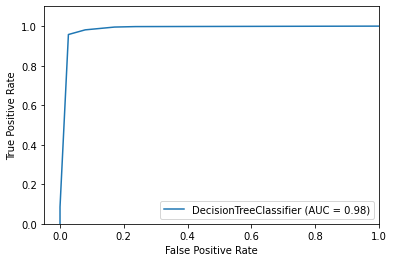

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(tree_clf, X, y)
lw = 2
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.plot([-0.1, 1], [0, 1.1], color='red', lw=lw, linestyle='--')
# plt.plot([-0.2, 1], [0, 1.2], color='red', lw=lw, linestyle='--')
# plt.plot([-0.3, 1], [0, 1.3], color='red', lw=lw, linestyle='--')
# plt.plot([-0.4, 1], [0, 1.4], color='red', lw=lw, linestyle='--')
# plt.plot([-0.5, 1], [0, 1.5], color='red', lw=lw, linestyle='--')
# plt.plot([-0.6, 1], [0, 1.6], color='red', lw=lw, linestyle='--')
# plt.plot([-0.7, 1], [0, 1.7], color='red', lw=lw, linestyle='--')

plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.1])
plt.show()

In [ ]:
result = y_pred_proba[:] < 0.7

In [ ]:
positve_proba = np.zeros(500)
i = 0
for vec in result:
  if vec[0]:
    positve_proba[i] = True
  else:
    positve_proba[i] = False
  i = i + 1
np.unique(positve_proba, return_counts=True)

(array([0., 1.]), array([ 65, 435]))

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y, positve_proba)
conf_matrix

array([[ 63,  13],
       [  2, 422]])